In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("./combinedData3.csv")
df_original = df.copy()

In [3]:
df.head()

,office,state,year,county,repcandidate,repstatus,demcandidate,demstatus,winningParty,LastPartyWon,LastDemVotePercent,LastRepVotePercent,LastPartyWon_2,LastDemVotePercent_2,LastRepVotePercent_2,LastPartyWon_3,LastDemVotePercent_3,LastRepVotePercent_3,StateResult,matchingOutcomes,officeMatchingOutcome,DemPoll,RepPoll,population,tot_male,tot_female,nh_male,nh_female,h_male,h_female,wa_male,wa_female,ba_male,ba_female,ia_male,ia_female,aa_male,aa_female,nhwa_male,nhwa_female,nhba_male,nhba_female,nhia_male,nhia_female,nhaa_male,nhaa_female,hwa_male,hwa_female,hba_male,hba_female,hia_male,hia_female,haa_male,haa_female,Labor Force Size,Employed,Unemployed,Unemployment Rate,%_less_HS,%_HS_Only,%_Some_College,%_Bachelors,age04,age59,age1014,age1519,age2024,age2529,age3034,age3539,age4044,age4549,age5054,age5559,age6064,age6569,age7074,age7579,age8084,age85plus,GDP Growth (%),Annual GDP Change (%),National Unemployment %
0,President,Kentucky,2020,Bourbon,"Trump, Donald J.",Incumbent,"Biden, Joseph R. Jr.",Challenger,R,R,33.39,66.61,R,39.59,60.41,R,41.26,58.74,R,0.777778,1.000000,39.86309,55.59515,19901,0.489624,0.510376,0.448319,0.482740,0.041304,0.027637,0.443696,0.465504,0.029797,0.029848,0.002311,0.001809,0.002764,0.002563,0.407015,0.441284,0.027938,0.028441,0.000904,0.000904,0.002261,0.002311,0.036682,0.024220,0.001859,0.001407,0.001407,0.000904,0.000502,0.000251,9577,9016,561,5.9,16.0,35.6,28.9,19.4,0.057635,0.063163,0.066278,0.059595,0.056279,0.063313,0.056429,0.051605,0.057284,0.063012,0.064117,0.073363,0.068288,0.060097,0.054168,0.036028,0.024722,0.024622,-3.49,-5.65,8.1
1,Senate,Kentucky,2020,Bourbon,"McConnell, Mitch",Incumbent,"McGrath, Amy",Challenger,R,R,45.41,54.59,D,52.26,47.74,R,36.63,63.37,R,0.777778,0.636364,39.86309,55.59515,19901,0.489624,0.510376,0.448319,0.482740,0.041304,0.027637,0.443696,0.465504,0.029797,0.029848,0.002311,0.001809,0.002764,0.002563,0.407015,0.441284,0.027938,0.028441,0.000904,0.000904,0.002261,0.002311,0.036682,0.024220,0.001859,0.001407,0.001407,0.000904,0.000502,0.000251,9577,9016,561,5.9,16.0,35.6,28.9,19.4,0.057635,0.063163,0.066278,0.059595,0.056279,0.063313,0.056429,0.051605,0.057284,0.063012,0.064117,0.073363,0.068288,0.060097,0.054168,0.036028,0.024722,0.024622,-3.49,-5.65,8.1
2,President,Georgia,2020,Camden,"Trump, Donald J.",Incumbent,"Biden, Joseph R. Jr.",Challenger,R,R,32.51,67.49,R,35.99,64.01,R,38.17,61.83,D,0.791667,0.875000,48.54042,47.36694,55388,0.512458,0.487542,0.473550,0.454954,0.038907,0.032588,0.390915,0.358074,0.092728,0.098686,0.003611,0.003466,0.007438,0.009154,0.360024,0.333087,0.088575,0.094876,0.002419,0.002401,0.006734,0.008540,0.030891,0.024987,0.004153,0.003809,0.001192,0.001065,0.000704,0.000614,21089,20092,997,4.7,8.7,32.2,35.3,23.9,0.069094,0.069437,0.065772,0.059598,0.087510,0.086048,0.078429,0.065736,0.050823,0.049758,0.053297,0.060230,0.058298,0.048801,0.042356,0.028833,0.015310,0.010670,-3.49,-5.65,8.1
3,Senate,Iowa,2020,Shelby,"Ernst, Joni",Incumbent,"Greenfield, Theresa",Challenger,R,R,28.64,71.36,D,55.31,44.69,R,40.83,59.17,R,0.592593,0.727273,46.31091,47.59527,11430,0.494926,0.505074,0.476115,0.488714,0.018810,0.016360,0.474978,0.488014,0.007087,0.004987,0.002625,0.003237,0.003325,0.003062,0.459755,0.475066,0.005249,0.003325,0.001837,0.002100,0.003062,0.002975,0.015223,0.012948,0.001837,0.001662,0.000787,0.001137,0.000262,0.000087,6318,6090,228,3.6,7.6,35.3,34.9,22.2,0.052056,0.064392,0.066929,0.062905,0.050481,0.048119,0.046194,0.049431,0.048644,0.053981,0.062992,0.079615,0.079003,0.066492,0.054593,0.039633,0.032896,0.041645,-3.49,-5.65,8.1
4,President,Iowa,2020,Shelby,"Trump, Donald J.",Incumbent,"Biden, Joseph R. Jr.",Challenger,R,R,27.59,72.41,R,38.70,61.30,R,45.08,54.92,R,0.592593,0.375000,46.31091,47.59527,11430,0.494926,0.505074,0.476115,0.488714,0.018810,0.016360,0.474978,0.488014,0.007087,0.004987,0.002625,0.003237,0.003325,0.003062,0.459755,0.475066,0.005249,0.003325,0.001837,0.002100,0.003062,0.002975,0.015223,0.012948,0.001837,0.001662,0.

## dropping unnecessary columns and changing column types


In [4]:
print(min(df['LastDemVotePercent'] + df['LastRepVotePercent']))
print(max(df['LastDemVotePercent'] + df['LastRepVotePercent']))
print(min(df['LastDemVotePercent_2'] + df['LastRepVotePercent_2']))
print(max(df['LastDemVotePercent_2'] + df['LastRepVotePercent_2']))
print(min(df['LastDemVotePercent_3'] + df['LastRepVotePercent_3']))
print(max(df['LastDemVotePercent_3'] + df['LastRepVotePercent_3']))

# repvotesmajorpercent and demvotesmajorpercent always add up to around 100
df.drop(columns=['LastRepVotePercent', 'LastRepVotePercent_2', 'LastRepVotePercent_3'], inplace=True)

100.0
100.01
100.0
100.01
100.0
100.01


In [5]:
print(min(df['%_less_HS'] + df['%_HS_Only'] + df['%_Some_College'] + df['%_Bachelors']))
print(max(df['%_less_HS'] + df['%_HS_Only'] + df['%_Some_College'] + df['%_Bachelors']))

df.drop(columns='%_less_HS', inplace = True)

99.88999999999999
100.11000000000001


In [6]:
# Labor Force Size and Unemployment Rate covers Employed and Unemployed
df.drop(columns='Employed', inplace=True)
df.drop(columns='Unemployed', inplace=True)

# Shouldn't be used in machine learning models
df.drop(columns=['repcandidate', 'demcandidate', 'StateResult'], inplace=True)

In [7]:
# repstatus and demstatus are Challenger or Incumbent
print(df['repstatus'].value_counts())
print(df['demstatus'].value_counts())
n1 = sum((df['repstatus'] == 'Challenger') & (df['demstatus'] == 'Challenger'))
n2 = sum((df['repstatus'] == 'Challenger') & (df['demstatus'] == 'Incumbent'))
n3 = sum((df['repstatus'] == 'Incumbent') & (df['demstatus'] == 'Challenger'))
n4 = sum((df['repstatus'] == 'Incumbent') & (df['demstatus'] == 'Incumbent'))

print(n1,n2,n3,n4)

Challenger    44635
Incumbent     29865
Name: repstatus, dtype: int64
Challenger    54118
Incumbent     20382
Name: demstatus, dtype: int64
24345 20290 29773 92


In [8]:
df['dem_incumbent'] = df['demstatus'] == 'Incumbent'
df['dem_incumbent'] = df['dem_incumbent'].astype('int')
df['rep_incumbent'] = df['repstatus'] == 'Incumbent'
df['rep_incumbent'] = df['rep_incumbent'].astype('int')
df.drop(columns=['demstatus', 'repstatus'], inplace=True)

In [9]:
print(df['winningParty'].value_counts())
print(df['LastPartyWon'].value_counts())
print(df['LastPartyWon_2'].value_counts())
print(df['LastPartyWon_3'].value_counts())

df['demWon'] = df['winningParty'] == 'D'
df['demWonLast'] = df['LastPartyWon'] == 'D'
df['demWonLast_2'] = df['LastPartyWon_2'] == 'D'
df['demWonLast_3'] = df['LastPartyWon_3'] == 'D'
df['demWon'] = df['demWon'].astype('int')
df['demWonLast'] = df['demWonLast'].astype('int')
df['demWonLast_2'] = df['demWonLast_2'].astype('int')
df['demWonLast_3'] = df['demWonLast_3'].astype('int')

df.drop(columns=['winningParty', 'LastPartyWon', 'LastPartyWon_2', 'LastPartyWon_3'], inplace=True)

R    51500
D    23000
Name: winningParty, dtype: int64
R    48668
D    25832
Name: LastPartyWon, dtype: int64
R    46121
D    28379
Name: LastPartyWon_2, dtype: int64
R    44739
D    29761
Name: LastPartyWon_3, dtype: int64


In [10]:
df.shape

(74500, 74)

## Dealing with Missing Value

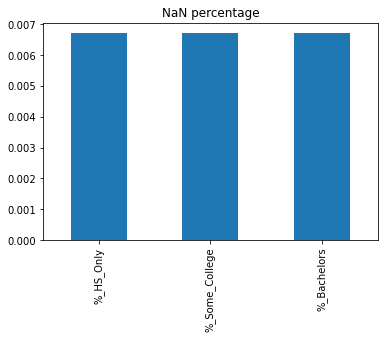

In [11]:
col_with_null = []
for (columnName, columnData) in df.iteritems():
    if columnData.isnull().sum():
        col_with_null.append(columnName)

df_na = ((df[col_with_null].isnull().sum() / len(df[col_with_null])) * 100).sort_values(ascending=False)
df_na.plot(kind='bar')

plt.title("NaN percentage")
plt.show()

In [14]:
df=df.dropna()
df.isnull().sum().sum()
df.loc[:10000].to_csv('C:/Users/sshim/Downloads/170BProject/ElectionPredictions/df_ml.csv')

In [13]:
df.head()

,office,state,year,county,LastDemVotePercent,LastDemVotePercent_2,LastDemVotePercent_3,matchingOutcomes,officeMatchingOutcome,DemPoll,RepPoll,population,tot_male,tot_female,nh_male,nh_female,h_male,h_female,wa_male,wa_female,ba_male,ba_female,ia_male,ia_female,aa_male,aa_female,nhwa_male,nhwa_female,nhba_male,nhba_female,nhia_male,nhia_female,nhaa_male,nhaa_female,hwa_male,hwa_female,hba_male,hba_female,hia_male,hia_female,haa_male,haa_female,Labor Force Size,Unemployment Rate,%_HS_Only,%_Some_College,%_Bachelors,age04,age59,age1014,age1519,age2024,age2529,age3034,age3539,age4044,age4549,age5054,age5559,age6064,age6569,age7074,age7579,age8084,age85plus,GDP Growth (%),Annual GDP Change (%),National Unemployment %,dem_incumbent,rep_incumbent,demWon,demWonLast,demWonLast_2,demWonLast_3
0,President,Kentucky,2020,Bourbon,33.39,39.59,41.26,0.777778,1.000000,39.86309,55.59515,19901,0.489624,0.510376,0.448319,0.482740,0.041304,0.027637,0.443696,0.465504,0.029797,0.029848,0.002311,0.001809,0.002764,0.002563,0.407015,0.441284,0.027938,0.028441,0.000904,0.000904,0.002261,0.002311,0.036682,0.024220,0.001859,0.001407,0.001407,0.000904,0.000502,0.000251,9577,5.9,35.6,28.9,19.4,0.057635,0.063163,0.066278,0.059595,0.056279,0.063313,0.056429,0.051605,0.057284,0.063012,0.064117,0.073363,0.068288,0.060097,0.054168,0.036028,0.024722,0.024622,-3.49,-5.65,8.1,0,1,0,0,0,0
1,Senate,Kentucky,2020,Bourbon,45.41,52.26,36.63,0.777778,0.636364,39.86309,55.59515,19901,0.489624,0.510376,0.448319,0.482740,0.041304,0.027637,0.443696,0.465504,0.029797,0.029848,0.002311,0.001809,0.002764,0.002563,0.407015,0.441284,0.027938,0.028441,0.000904,0.000904,0.002261,0.002311,0.036682,0.024220,0.001859,0.001407,0.001407,0.000904,0.000502,0.000251,9577,5.9,35.6,28.9,19.4,0.057635,0.063163,0.066278,0.059595,0.056279,0.063313,0.056429,0.051605,0.057284,0.063012,0.064117,0.073363,0.068288,0.060097,0.054168,0.036028,0.024722,0.024622,-3.49,-5.65,8.1,0,1,0,0,1,0
2,President,Georgia,2020,Camden,32.51,35.99,38.17,0.791667,0.875000,48.54042,47.36694,55388,0.512458,0.487542,0.473550,0.454954,0.038907,0.032588,0.390915,0.358074,0.092728,0.098686,0.003611,0.003466,0.007438,0.009154,0.360024,0.333087,0.088575,0.094876,0.002419,0.002401,0.006734,0.008540,0.030891,0.024987,0.004153,0.003809,0.001192,0.001065,0.000704,0.000614,21089,4.7,32.2,35.3,23.9,0.069094,0.069437,0.065772,0.059598,0.087510,0.086048,0.078429,0.065736,0.050823,0.049758,0.053297,0.060230,0.058298,0.048801,0.042356,0.028833,0.015310,0.010670,-3.49,-5.65,8.1,0,1,0,0,0,0
3,Senate,Iowa,2020,Shelby,28.64,55.31,40.83,0.592593,0.727273,46.31091,47.59527,11430,0.494926,0.505074,0.476115,0.488714,0.018810,0.016360,0.474978,0.488014,0.007087,0.004987,0.002625,0.003237,0.003325,0.003062,0.459755,0.475066,0.005249,0.003325,0.001837,0.002100,0.003062,0.002975,0.015223,0.012948,0.001837,0.001662,0.000787,0.001137,0.000262,0.000087,6318,3.6,35.3,34.9,22.2,0.052056,0.064392,0.066929,0.062905,0.050481,0.048119,0.046194,0.049431,0.048644,0.053981,0.062992,0.079615,0.079003,0.066492,0.054593,0.039633,0.032896,0.041645,-3.49,-5.65,8.1,0,1,0,0,1,0
4,President,Iowa,2020,Shelby,27.59,38.70,45.08,0.592593,0.375000,46.31091,47.59527,11430,0.494926,0.505074,0.476115,0.488714,0.018810,0.016360,0.474978,0.488014,0.007087,0.004987,0.002625,0.003237,0.003325,0.003062,0.459755,0.475066,0.005249,0.003325,0.001837,0.002100,0.003062,0.002975,0.015223,0.012948,0.001837,0.001662,0.000787,0.001137,0.000262,0.000087,6318,3.6,35.3,34.9,22.2,0.052056,0.064392,0.066929,0.062905,0.050481,0.048119,0.046194,0.049431,0.048644,0.053981,0.062992,0.079615,0.079003,0.066492,0.054593,0.039633,0.032896,0.041645,-3.49,-5.65,8.1,0,1,0,0,0,0
